In [1]:
from utils.conllu import read_conllu_dataset, enumerate_word_upos_pairs, enumerate_words, enumerate_tags, filtered_words
from utils.helpers import list_to_value_count_pairs
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt

In [2]:
train_sentences = read_conllu_dataset("data/ro_rrt-ud-train.conllu")
len(train_sentences)

8043

In [3]:
pd.DataFrame(train_sentences[0], columns=['Word', 'UPOS'])

,Word,UPOS
0,Lui,DET
1,Winston,PROPN
2,îi,PRON
3,displăcuse,VERB
4,fata,NOUN
5,asta,DET
6,din,ADP
7,primul,NUM
8,moment,NOUN
9,când,ADV


In [4]:
len(set(enumerate_words(train_sentences)))

30962

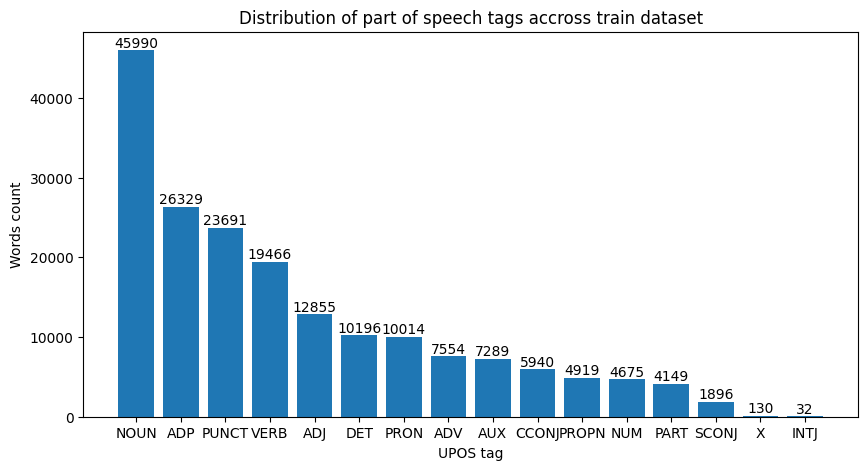

In [5]:
tags_cnt = list_to_value_count_pairs(enumerate_tags(train_sentences))
tags_cnt = sorted(tags_cnt, key=lambda _:-_[1])
plt.figure(figsize=(10,5))
bars = plt.bar(list(map(lambda _:_[0], tags_cnt)), list(map(lambda _:_[1], tags_cnt)))
plt.bar_label(bars)
plt.title("Distribution of part of speech tags accross train dataset")
plt.xlabel("UPOS tag")
plt.ylabel("Words count")
plt.show()

In [6]:
print(list(map(lambda _:_[0], sorted(tags_cnt))))

['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'VERB', 'X']


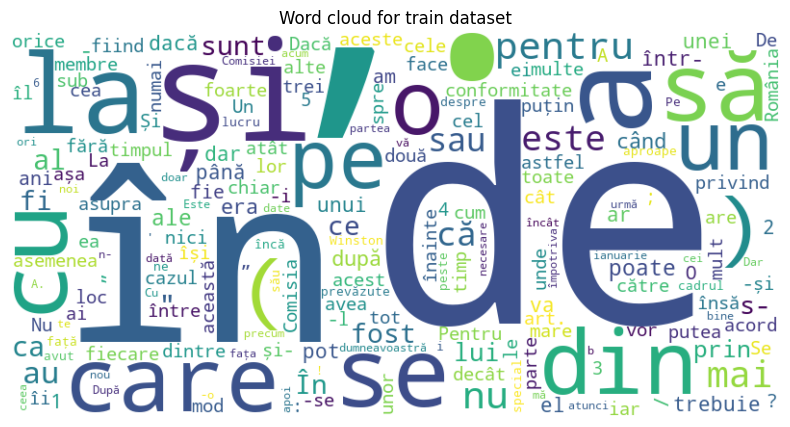

In [7]:
words_cnt = list_to_value_count_pairs(enumerate_words(train_sentences), as_counter=True)
wcloud = wordcloud.WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_cnt)
plt.figure(figsize=(10, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud for train dataset")
plt.show()

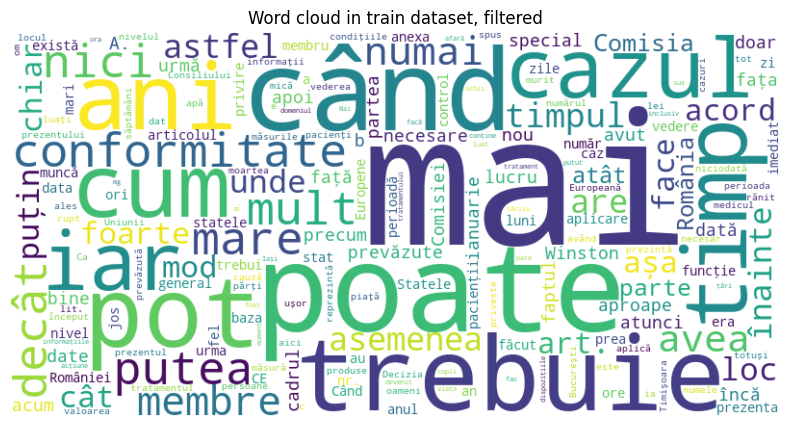

In [8]:

word_filter = lambda _,p: p not in ['ADP', 'X', 'PUNCT', 'CCONJ', 'SCONJ', 'AUX', 'PRON', 'NUM', 'DET', 'PART']
words_cnt = list_to_value_count_pairs(filtered_words(train_sentences, word_filter), as_counter=True)
wcloud = wordcloud.WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_cnt)
plt.figure(figsize=(10, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud in train dataset, filtered")
plt.show()

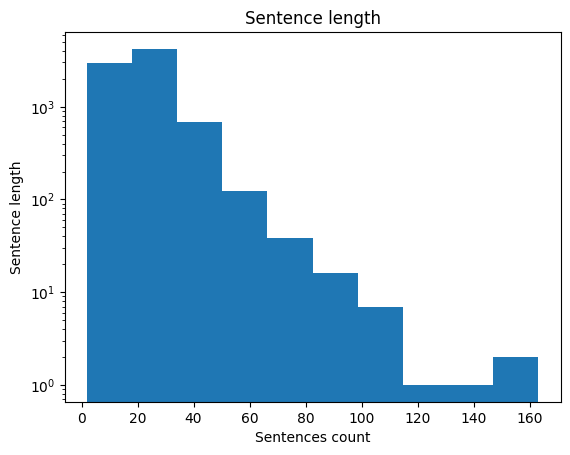

In [18]:
plt.hist([len(s) for s in train_sentences])
plt.title("Sentence length")
plt.ylabel("Sentence length")
plt.xlabel("Sentences count")
plt.yscale("log")
plt.show()

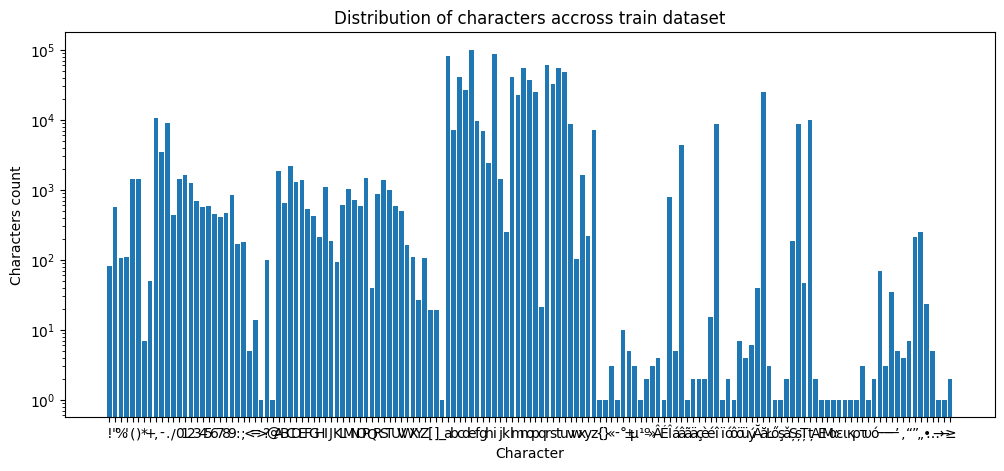

In [10]:
from collections import Counter
chars_cnt = list(Counter(''.join(enumerate_words(train_sentences))).items())
#tags_cnt = list_to_value_count_pairs(enumerate_tags(train_sentences))
chars_cnt = sorted(chars_cnt, key=lambda _:_[0])
plt.figure(figsize=(12,5))
bars = plt.bar(list(map(lambda _:_[0], chars_cnt)), list(map(lambda _:_[1], chars_cnt)))
#plt.bar_label(bars)
plt.title("Distribution of characters accross train dataset")
plt.xlabel("Character")
plt.ylabel("Characters count")
plt.yscale("log")
plt.show()

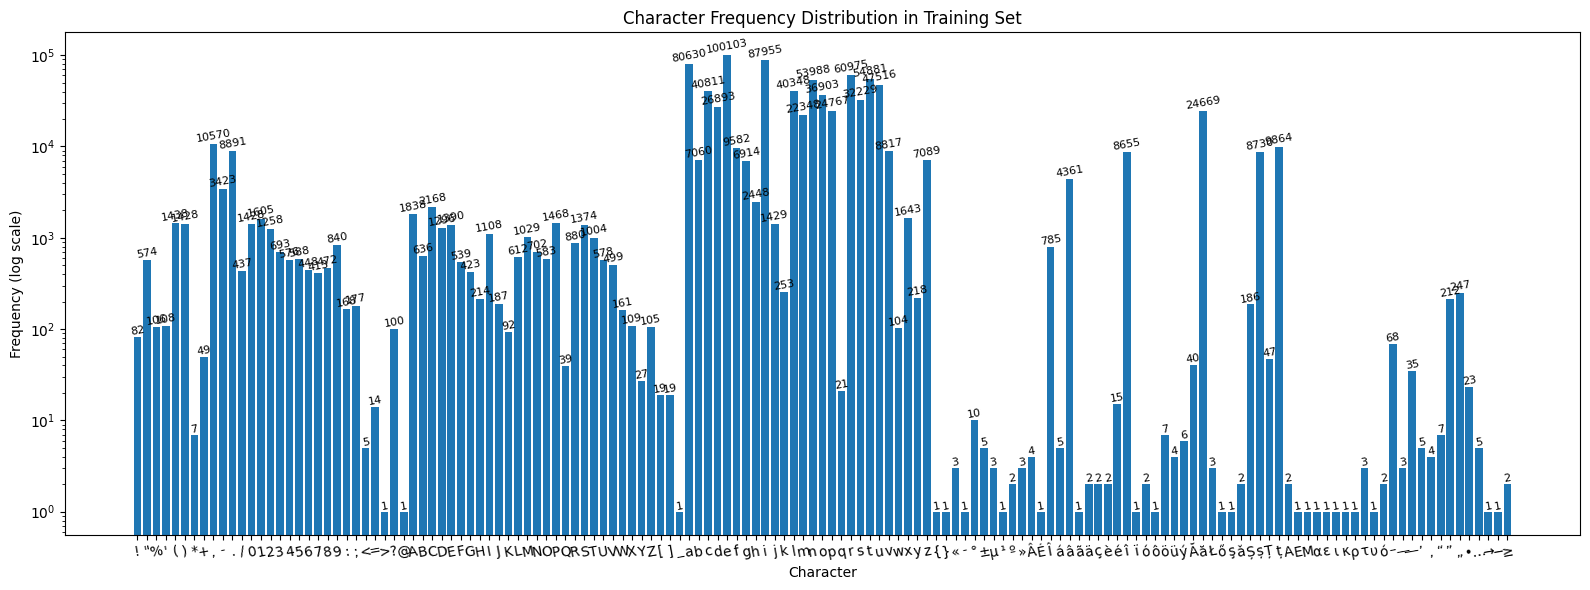

In [17]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count character frequencies
char_counts = Counter(''.join(enumerate_words(train_sentences)))
chars, freqs = zip(*sorted(char_counts.items(), key=lambda x: x[0]))

# Plot
plt.figure(figsize=(16, 6))
bars = plt.bar(chars, freqs)

# Add count labels on top of bars
for bar, count in zip(bars, freqs):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height, f'{count}', ha='center', va='bottom', fontsize=8, rotation=10)

# Style and labels
plt.yscale('log')  # Use log scale for better visibility
plt.xticks(rotation=10)
plt.title("Character Frequency Distribution in Training Set")
plt.xlabel("Character")
plt.ylabel("Frequency (log scale)")
plt.tight_layout()
plt.show()
